### Polynomial Linear Regression


Polynomial regression is a form of regression analysis in which the relationship between the independent variable `x` and the dependent variable `y` is modelled as an `n`th degree polynomial in `x`.

<a href="https://imgur.com/VWhAziI"><img src="https://i.imgur.com/VWhAziI.png" title="source: imgur.com" /></a>


We use a polynomial regression when the **straight line** (like in Linear Regression) doesn’t fit well our observations and we want to obtain parabolic effect:

<a href="https://imgur.com/yUffONM"><img src="https://i.imgur.com/yUffONM.png" title="source: imgur.com" /></a>  

Reference: [Polynomial Regression](https://towardsdatascience.com/polynomial-regression-bbe8b9d97491)

Let's take an example to explain Polynomial Regression.

# Step1 : Importing libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Position_Salaries.csv to Position_Salaries.csv


# Step 2 : Data read

In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Position_Salaries.csv']))

Position and the Level of the employee represent the same thing. So in our machine learning model, it is sufficient to consider just one of them as a feature. In this case, we can select the column Level.



#Step 3 : Data Preprocessing


## Checking for null values


In [ ]:
df.isnull().sum()*100/df.shape[0]

Position    0.0
Level       0.0
Salary      0.0
dtype: float64

Since they aren't any null values, we can proceed further.

# Step 4 : Data Analysis

## Scatter plot


Since there is only one feature, it is futile to analyse a scatter plot here.

## Correlation matrix

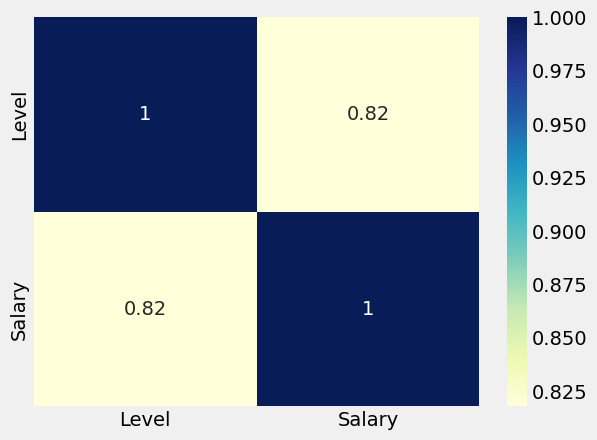

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Step 5 : Model Fitting

## Spilt Train Test


We will not be splitting the dataset as we have only **10 data points**. So we can consider all the values for our training purpose.

In [ ]:
X=df.iloc[:,1:2].values
y=df.iloc[:,2].values


In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg2=PolynomialFeatures(degree=2)
X_poly=poly_reg2.fit_transform(X)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y)

In [ ]:
poly_reg3=PolynomialFeatures(degree=3)
X_poly3=poly_reg3.fit_transform(X)
lin_reg_3=LinearRegression()
lin_reg_3.fit(X_poly3,y)

# Step 6 : Model Evaluation

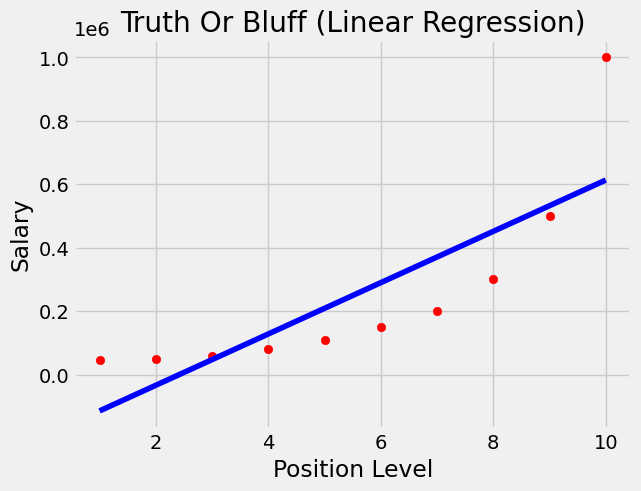

In [ ]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X),color='blue')
plt.title('Truth Or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

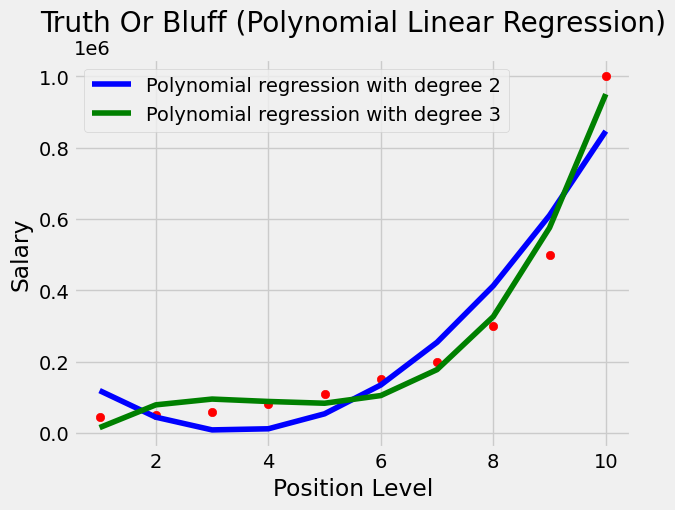

In [ ]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg2.fit_transform(X)),color='blue',label='Polynomial regression with degree 2')
plt.plot(X,lin_reg_3.predict(poly_reg3.fit_transform(X)),color='green',label='Polynomial regression with degree 3')
plt.title('Truth Or Bluff (Polynomial Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

We can clearly see that the Polynomial Linear Regression model has much better results compared to Linear Regression Model. As we increase the degree of the polynomial regression, the correlation increases. 4th-degree Polynomial Linear Regression will give us the best correlation for salary data.